In [1]:
%matplotlib inline
import numpy as np
from progress.bar import Bar
from matrix_neural_net import Network
import matplotlib.pyplot as plt
import mnist
from tqdm import tqdm_notebook , tnrange
from IPython import display

In [2]:
# load images and labels of the MNIST data set 
# each element in x_train/x_test is a handwritten digit
# and each element in y_train/y_test is the associated 
# label for that digit (0-9)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# generates an array of 0's with 1 at the position of the correct digit
# in order to match the output of the network's classification
def one_hot_encode(val):
    r = np.zeros(10)
    r[int(val)] = 1
    return r

In [5]:
y_train = np.array([one_hot_encode(i) for i in y_train])
y_test = np.array([one_hot_encode(i) for i in y_test])

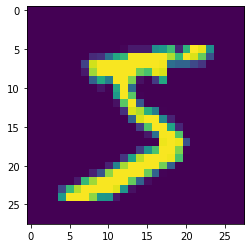

In [6]:
# example of one of the handwritten digits
plt.imshow(x_train[0])

In [7]:
# each image is 28x28 pixels, which is flattened
# out into an input array of length 784
len(x_train[0].flatten())

784

In [8]:
# instatiate network with sigmoid activation
# this shape returns an ~80% testing accuracy 
# and takes about 4m30s to train on the MNIST 
# dataset (60,000 images) on an intel pentium, 
# 8Gb memory
network = Network(
    shape=[784, 200,80, 10], 
    activation = 'sigmoid', output_activation='sigmoid',
    learning_rate= 0.01
)

In [9]:
# verify that the forwad pass works and provides an 
# output with a probability for each label
guess = network.forward_pass(x_train[0].flatten())
guess

/home/leo/machine_learning/simple_neural_net/matrix_neural_net.py:20: RuntimeWarning: overflow encountered in exp
  lambda X: 1. / (1. + np.exp(-X)),


array([0.02455302, 0.02886941, 0.15066716, 0.96059277, 0.54889627,
       0.72758867, 0.20572476, 0.49915987, 0.97647272, 0.11306913])

In [10]:
# the position of the highest probability is taken
# to be the network's output
interpret = lambda x: np.argmax(x)
interpret(guess)

8

In [11]:
# verify that the backwards pass works
network.backward_pass(
    network_input = x_train[0].flatten(),
    network_output = guess, 
    expected_output = y_train[0]
)

In [12]:
# training the network: 
# the training and testing sets are split up into 100 epochs 
# each epoch executes 600 training passes (forward and backwards)
# propagation, followed by 100 testing passes to determine the 
# accuracy. The cost function is (y_expected - y_output)**2

accuracies = []
num_epochs = 100

for i in tnrange(num_epochs, desc="Training"):
    
    # find then start and end indices in the training
    # and testing sets for this training epoch 
    train_start = i * int(len(x_train)/num_epochs)
    train_end = (i+1) * int(len(x_train)/num_epochs)
    test_start = i * int(len(x_test)/num_epochs)
    test_end = (i+1) * int(len(x_test)/num_epochs)
    
    # TRAIN
    for i in range(train_start, train_end):
        
        output = network.forward_pass(x_train[i].flatten())
        
        network.backward_pass(
            network_input = x_train[i].flatten(),
            network_output = output,
            expected_output = y_train[i]
        )

    # TEST
    correct= 0
    for i in range(test_start, test_end):
        
        output = network.forward_pass(x_test[i].flatten())
        
        if interpret(output) == interpret(y_test[i]):
            correct += 1
        
    accuracy = correct /(test_end - test_start)
    accuracies.append(accuracy)

 

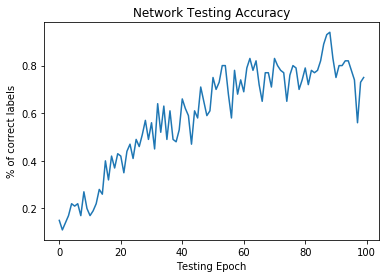

In [13]:
# Testing accuracy: the percentage of correct guesses in 
# each testing pass
plt.figure()
plt.plot(accuracies)
plt.title("Network Testing Accuracy")
plt.xlabel("Testing Epoch")
plt.ylabel("% of correct labels")
plt.show()

In [ ]:
# POSSIBLE IMPROVEMENTS: 
# 1. Implement Softmax output activation function. I have read that this 
#    performs better with classification problems since it normalizes the 
#    the output vector to have a norm of 1
# 2. Implement an adaptable learning rate
# 3. Implement some sort of data set augmentation 
# 4. Implement some sort of convolution and pooling layers for faster computation
# 5. Implement adams optimizer for more efficient gradient descent
# 6. Research more on various error functions that can be used to evaluate the model. 